K-Means for the Image segmentation

In [4]:
from PIL import Image
import numpy as np
file_path = "sawako.jpeg"
image = np.asarray(Image.open(file_path))

In [5]:
image.shape

(675, 450, 3)

In [6]:
X = image.reshape(-1, 3)
X.shape

(303750, 3)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [8]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

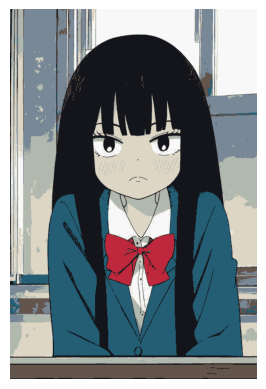

In [10]:
import matplotlib.pyplot as plt

plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()